# KMeans from scratch

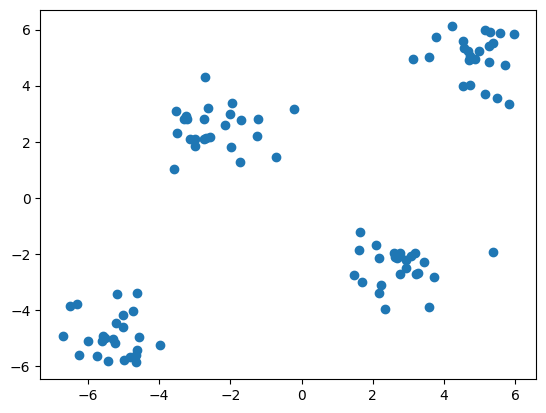

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

centroids = [(-5,-5), (5,5), (-2.5,2.5), (2.5,-2.5)]
cluster_std = [0.7, 0.7, 0.7, 0.7]

X,y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)
plt.scatter(X[:,0], X[:,1])

In [248]:
class MeraKMeans:

    def __init__(self, tol=0.1, n_clusters=4, n_iters=100):
        self.n_clusters = n_clusters
        self.tol = tol
        self.n_iters = n_iters
        self.centroids = None
        self.clusters = None

    def fit_predict(self, X):
        # initialize centroids using the random points from X
        random_idx = np.random.choice(range(X.shape[0]), self.n_clusters)    # no. of centroids = no. of clusters
        self.centroids = X[random_idx]

        for iteration in range(self.n_iters):
            # assign clusters
            self.assign_clusters(X)
    
            # update centroids 
            old_centroids = self.update_centroids(X)

            # check if centroid didnt move 
            if (old_centroids == self.centroids).all():
                break

        return self.clusters
        

    def assign_clusters(self, X):
        clusters = []
        distances = []
        for row in X:
            for centroid in self.centroids:
                # calculate euclidian distance of each row from each centroid
                distances.append(np.sqrt((row - centroid) @ (row - centroid)))  
            # assign row to the closest centroid (minimum distance)
            clusters.append(np.argmin(distances))
            # clear distances for new row
            distances.clear()

        self.clusters = np.array(clusters)

    def update_centroids(self, X):
        old_centroids = self.centroids
        new_centroids = []
        clusters = np.unique(self.clusters)
        # for each cluster
        for cluster in clusters:
            # find mean along each axis
            mean = []
            for col in range(X.shape[1]):
                # appending mean along each axis to mean
                mean.append(np.mean(X[self.clusters == cluster, col]))
            new_centroids.append(mean)
        self.centroids = np.array(new_centroids)
        return old_centroids

In [253]:
km = MeraKMeans(n_iters=1000)
y = km.fit_predict(X)
y

array([2, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 2, 1, 1, 1, 3, 0, 0, 0, 0, 0,
       1, 2, 1, 2, 1, 2, 0, 3, 1, 3, 2, 0, 2, 2, 1, 3, 1, 3, 2, 0, 3, 3,
       0, 3, 1, 2, 1, 1, 2, 0, 3, 3, 3, 0, 3, 0, 3, 2, 3, 2, 0, 3, 1, 2,
       3, 3, 3, 0, 3, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 1, 1, 2, 1, 0, 2, 3,
       0, 2, 1, 0, 2, 3, 1, 0, 1, 2, 2, 1])

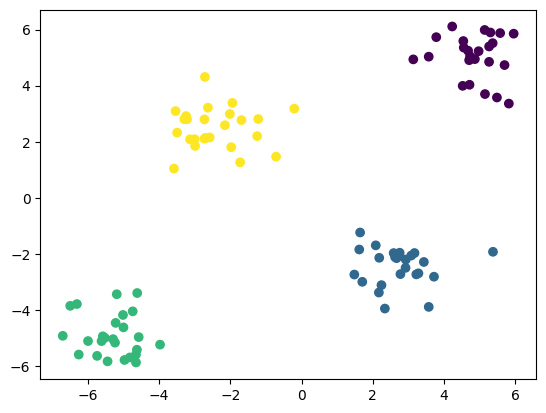

In [254]:
plt.scatter(X[:,0], X[:,1], c=y)